In [6]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
x = np.fromfile(r"/home/sms/vws/frappe/x.bin", dtype=np.float32)
X = np.reshape(x, (4, 1, 110, 256, 256))
video = X[0, :, :, :]

In [8]:
frame = video[:,10,:, :].squeeze()
#frame = np.stack((frame, frame, frame), axis=2)

In [27]:
from PIL import Image
import numpy as np
import scipy.fftpack as fp

## Functions to go from image to frequency-image and back
im2freq = lambda data: (fp.rfft(fp.rfft(data, axis=-1), axis=-2))

# Make sure the forward and backward transforms work!
#assert(np.allclose(data, back))

## Helper functions to rescale a frequency-image to [0, 255] and save
#remmax = lambda x: x/x.max()
#remmin = lambda x: x - np.amin(x, axis=(0,1), keepdims=True)
#touint8 = lambda x: (remmax(remmin(x))*(256-1e-4)).astype(int)

#img = touint8(freq)
pixellog = lambda x: np.log(1+np.abs(x))/np.log(1+np.amax(x))

In [9]:
full = video.squeeze()

In [10]:
freq_video = im2freq(full)

In [11]:
import imageio
imageio.mimwrite('output.mp4', np.uint8(pixellog(freq_video[:, 0:64, 0:64])))


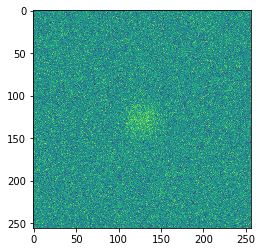

In [20]:
frame = video[:,10,:, :].squeeze()
plt.imshow(1-frame, interpolation="nearest", origin="upper")

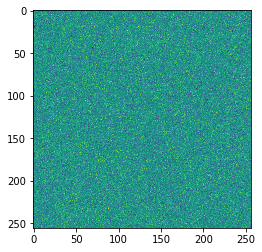

In [34]:
frame = video[:,109,:, :].squeeze()
plt.imshow(frame, interpolation="nearest", origin="upper")

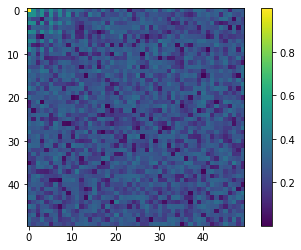

In [30]:
plt.imshow(pixellog(im2freq(full[10,:,:]))[0:50, 0:50], interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [31]:
frame = full[10,:,:]

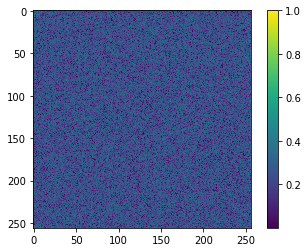

In [32]:
plt.imshow(pixellog(im2freq(frame)), interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

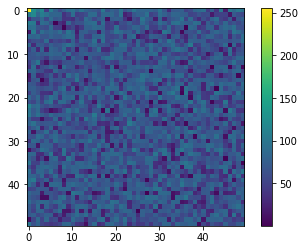

In [20]:
plt.imshow(pixellog(freq2[0:50, 0:50]), interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [21]:
all_frames = video[:,:,:,:].squeeze()

im2freq = lambda data: fp.rfft(fp.rfft(all_frames, axis=1),
                               axis=2)

all_freq = im2freq(all_frames)

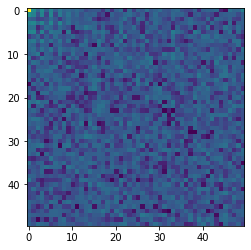

In [22]:
plt.imshow(pixellog(all_freq[10, 0:50, 0:50]), interpolation="nearest", origin="upper")


ModuleNotFoundError: No module named 'imageio'